In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\susanl99\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
real_news = pd.read_csv("True.csv")
real_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_news = pd.read_csv("Fake.csv")
fake_news.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
print(real_news.shape)
print(real_news.info())

(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [5]:
print(fake_news.shape)
print(fake_news.info())

(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [6]:
real_news['label'] = 0
fake_news['label'] = 1

In [7]:
#combine the two dataset
news = pd.concat([real_news,fake_news],axis = 0, ignore_index = True)
print(news.shape)
news.head(5)

(44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


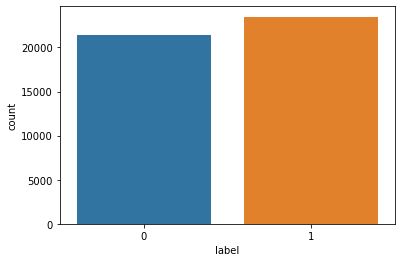

In [8]:
sns.countplot(news.label)

In [9]:
news.isnull().sum()
#no missing entries

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [10]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
stopwords_list = stopwords.words('english')
#expand the stopwords list
stopwords_list.extend(['thanks','also','would','please','could','really','many','anyone','good','video'])

news['title'] = news['title'].apply(lambda x: ''.join([word for word in x.split() if word not in (stopwords_list)]))

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\susanl99\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
#we might want to lemmatize words
def lemmatize_words(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lem = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return lem

news['title']=news['title'].apply(lemmatize_words)

In [14]:
from sklearn.model_selection import train_test_split
y = news['label']
X = news['title']


#X_train, X_test, y_train, y_test = train_test_split(news['title'],y, test_size=0.3,random_state=22)

X_train = []
X_test = []
y_test = []
y_train = []
for i in np.arange(X.shape[0]):
    # for each example i, make it into train set with probabiliy 0.8 and into test set otherwise 
    U = np.random.rand() # Uniform([0,1]) variable
    if U<0.7:
        #X_train.append(X[i,:])
        X_train.append(X[i])
        y_train.append(y[i])
    else:
        #X_test.append(X[i,:])
        X_test.append(X[i])
        y_test.append(y[i])
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (31494,)
X_test.shape (13404,)
y_train.shape (31494,)
y_test.shape (13404,)


In [15]:
count_vectorizer = CountVectorizer(stop_words=stopwords_list)
#count_vectorizer = TfidfVectorizer(stop_words=stopwords_list)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train = np.asarray(count_train.todense())
count_test = np.asarray(count_test.todense())
print(count_train.shape)
print(count_test.shape)

(31494, 56134)
(13404, 56134)


In [16]:
Y_train = []
Y_test = []
for i in np.arange(y_train.shape[0]):
    if y_train[i] == 0:
        Y_train.append([1,0])
    else:
        Y_train.append([0,1])
Y_train = np.asarray(Y_train)

for i in np.arange(y_test.shape[0]):
    if y_test[i] == 0:
        Y_test.append([1,0])
    else:
        Y_test.append([0,1])
Y_test = np.asarray(Y_test)


print(Y_test.shape)
print(Y_train.shape)

(13404, 2)
(31494, 2)


Text(0.5, 0.98, 'Class conditional PMFs')

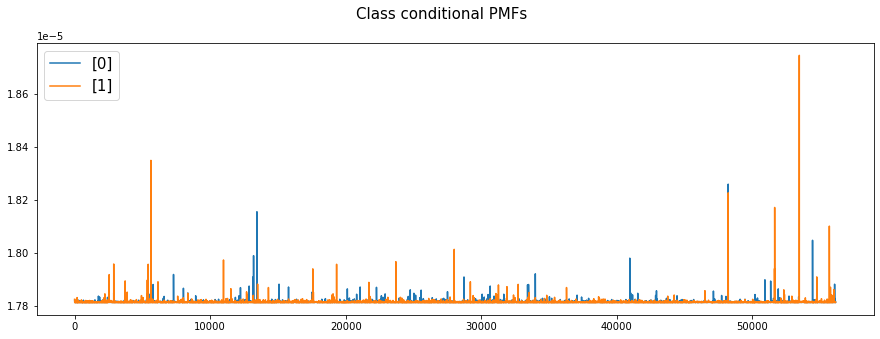

In [17]:

def fit_MNB(Y, H):
    '''
    Fit Multinomial Naive Bayes Calssifier
    Use the Maximum Likelihood prior and class conditional probabilities (in closed forms)
    Y = (n x k), H = (p x n) (\Phi in lecture note), W = (p x k)
    prior on class labels = empirical PMF = [ # class i examples / total ]
    class-conditional for class i = [ # word j in class i examples / # words in class i examples]
    Output = prior (k, ), class_conditional_PMF = (k, p)
    '''
    k = Y.shape[1] # number of classes 

    prior = np.sum(Y, axis=0)/np.sum(np.sum(Y, axis=0))

    class_conditional_PMF = []
    for i in np.arange(Y.shape[1]):
        idx = np.where(Y[:,i]==1)
        sub_H = H[:,idx[0]] + 1# add psuedocount
        word_count_per_class = np.sum(sub_H, axis=1)
        class_conditional_PMF.append(word_count_per_class/np.sum(word_count_per_class))

    return prior, np.asarray(class_conditional_PMF)

#test 
prior, class_conditional_PMF = fit_MNB(Y=Y_train, H=count_train.T)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 5])
H=count_train.T
for i in [0,1]:
    ax.plot(np.arange(H.shape[0]), class_conditional_PMF[i], label=[i])
ax.legend(fontsize='15')
plt.suptitle("Class conditional PMFs", fontsize='15')

In [23]:
#ind=np.argmax(class_conditional_PMF[1])
#print(count_vectorizer.get_feature_names()[ind])

video


(13404, 56134)
(2, 56134)


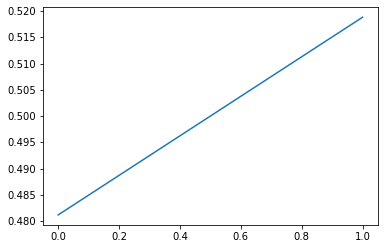

In [18]:
def predict_MNB(X_test, prior, class_conditional_PMF):
    '''
    Compute predicted PMF for the test data given prior and class_conditional_PMF
    Simple use of Bayes' Theorem 
    X_test = (p x n) (words x docs)
    '''
    print(X_test.shape)
    print(class_conditional_PMF.shape)
    
    P = class_conditional_PMF / np.min(class_conditional_PMF) # normalize so that log(P) is not too small 
    Q = np.exp(X_test @ np.log(P).T)
    Q = Q * np.repeat(prior[:, np.newaxis], repeats=Q.shape[0], axis=1).T
    sum_of_rows = Q.sum(axis=1)
    
    return Q / sum_of_rows[:, np.newaxis]

# test 
predictive_PMF = predict_MNB(count_test, prior, class_conditional_PMF)
plt.plot(predictive_PMF[0])

In [19]:
def compute_accuracy_metrics(Y_test, P_pred, use_opt_threshold=False, verbose=True):
    
    # y_test = binary label 
    # P_pred = predicted probability for y_test
    # compuate various binary classification accuracy metrics
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_pred, pos_label=None)
    mythre = thresholds[np.argmax(tpr - fpr)]
    myauc = metrics.auc(fpr, tpr)
    # print('!!! auc', myauc)
    
    # Compute classification statistics
    threshold = 0.4758
    if use_opt_threshold:
        threshold = mythre
    
    Y_pred = P_pred.copy()
    Y_pred[Y_pred >= threshold] = 0
    Y_pred[Y_pred < threshold] = 1

    mcm = confusion_matrix(Y_test, Y_pred)
    
    tn = mcm[0, 0]
    tp = mcm[1, 1]
    fn = mcm[1, 0]
    fp = mcm[0, 1]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tn / (tn + fp)
    specificity = tp / (tp + fn)
    precision = tp / (tp + fp)
    fall_out = fp / (fp + tn)
    miss_rate = fn / (fn + tp)

    # Save results
    results_dict = {}
    results_dict.update({'Y_test': Y_test})
    results_dict.update({'Y_pred': Y_pred})
    results_dict.update({'AUC': myauc})
    results_dict.update({'Opt_threshold': mythre})
    results_dict.update({'Accuracy': accuracy})
    results_dict.update({'Sensitivity': sensitivity})
    results_dict.update({'Specificity': specificity})
    results_dict.update({'Precision': precision})
    results_dict.update({'Fall_out': fall_out})
    results_dict.update({'Miss_rate': miss_rate})
    results_dict.update({'Confusion_mx': mcm})
    
    
    if verbose:
        for key in [key for key in results_dict.keys()]:
            if key not in ['Y_test', 'Y_pred', 'Confusion_mx']:
                print('% s ===> %.3f' % (key, results_dict.get(key)))
        print('Confusion matrix \n ===>', mcm)
            
    return results_dict

In [21]:
from sklearn.metrics import confusion_matrix
Q = predict_MNB(count_train, prior, class_conditional_PMF)
results_dict = compute_accuracy_metrics(Y_test=y_train, P_pred=Q[:,0], verbose=True)
print(results_dict)

(31494, 56134)
(2, 56134)
AUC ===> 0.033
Opt_threshold ===> 1.485
Accuracy ===> 0.522
Sensitivity ===> 0.000
Specificity ===> 1.000
Precision ===> 0.522
Fall_out ===> 1.000
Miss_rate ===> 0.000
Confusion matrix 
 ===> [[    0 15050]
 [    0 16444]]
{'Y_test': array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 'Y_pred': array([1., 1., 1., ..., 1., 1., 1.]), 'AUC': 0.03284458437818963, 'Opt_threshold': 1.4852081654236837, 'Accuracy': 0.5221311995935733, 'Sensitivity': 0.0, 'Specificity': 1.0, 'Precision': 0.5221311995935733, 'Fall_out': 1.0, 'Miss_rate': 0.0, 'Confusion_mx': array([[    0, 15050],
       [    0, 16444]], dtype=int64)}


In [72]:
from sklearn.metrics import confusion_matrix
Q = predict_MNB(count_test, prior, class_conditional_PMF)
results_dict = compute_accuracy_metrics(Y_test=y_test, P_pred=Q[:,1], verbose=True)
print(results_dict)

(13404, 56000)
(2, 56000)
AUC ===> 0.904
Opt_threshold ===> 0.520
Accuracy ===> 0.529
Sensitivity ===> 0.000
Specificity ===> 1.000
Precision ===> 0.529
Fall_out ===> 1.000
Miss_rate ===> 0.000
Confusion matrix 
 ===> [[   0 6312]
 [   0 7092]]
{'Y_test': array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 'Y_pred': array([1., 1., 1., ..., 1., 1., 1.]), 'AUC': 0.9040081109438365, 'Opt_threshold': 0.5203946318112526, 'Accuracy': 0.5290957923008057, 'Sensitivity': 0.0, 'Specificity': 1.0, 'Precision': 0.5290957923008057, 'Fall_out': 1.0, 'Miss_rate': 0.0, 'Confusion_mx': array([[   0, 6312],
       [   0, 7092]], dtype=int64)}


In [98]:
count_vectorizer = CountVectorizer(stop_words=stopwords_list)
#count_vectorizer = TfidfVectorizer(stop_words=stopwords_list)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
print(count_train.shape)
print(count_test.shape)

(31357, 55745)
(13541, 55745)


In [99]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()
nb1.fit(count_train,y_train)
pred1 = nb1.predict(count_test)

print(classification_report(y_test,pred1,target_names=['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.94      0.39      0.55      6401
        True       0.64      0.98      0.78      7140

    accuracy                           0.70     13541
   macro avg       0.79      0.69      0.66     13541
weighted avg       0.78      0.70      0.67     13541

